In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# male=1
# female=0
# Target (target)

# 1 = Heart disease present

# 0 = No heart disease

#  Chest Pain Type (cp)

# 0 = Typical angina

# 1 = Atypical angina

# 2 = Non-anginal pain

# 3 = Asymptomatic

#  Fasting Blood Sugar (fbs)

# 1 = > 120 mg/dl

# 0 = ≤ 120 mg/dl

#  Exercise Induced Angina (exang)

# 1 = Yes

# 0 = No

In [3]:
df = pd.read_csv('heart-disease-dataset.csv')

In [8]:
df.head()


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [6]:
df.shape

(1190, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   float64
 2   chest_pain_type      1190 non-null   float64
 3   resting_bp_s         1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   float64
 6   resting_ecg          1190 non-null   float64
 7   max_heart_rate       1190 non-null   float64
 8   exercise_angina      1190 non-null   float64
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   float64
 11  target               1190 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB


In [10]:
# Columns that shouldn’t have 0
cols_with_zero_issue = ['resting_bp_s', 'cholesterol', 'max_heart_rate']

# Check how many zeros are there
for col in cols_with_zero_issue:
    print(f"{col} zeros:", (df[col] == 0).sum())

resting_bp_s zeros: 1
cholesterol zeros: 172
max_heart_rate zeros: 0


In [11]:
for col in cols_with_zero_issue:
    df[col] = df[col].replace(0, np.nan)

# Replace NaN with median
df.fillna(df.median(), inplace=True)

In [12]:
X = df.drop('target', axis=1)  # all columns except target
y = df['target']               # heart disease label

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-1.46672783  0.55599543 -1.31835093  0.43086649  0.82980123 -0.52092948
  -0.80267229  1.26503857 -0.79521891 -0.84979236 -1.02321701]
 [-0.50460037 -1.79857595 -0.24893198  1.54465193 -1.22831907 -0.52092948
  -0.80267229  0.63775761 -0.79521891  0.07111913  0.61558278]
 [-1.78743698  0.55599543 -1.31835093 -0.12602623  0.7165102  -0.52092948
   0.34676216 -1.63613587 -0.79521891 -0.84979236 -1.02321701]
 [-0.61150342 -1.79857595  0.82048698  0.31948795 -0.58633659 -0.52092948
  -0.80267229 -1.24408527  1.25751537  0.53157488  0.61558278]
 [ 0.02991489  0.55599543 -0.24893198  0.98775921 -0.94509151 -0.52092948
  -0.80267229 -0.69521443 -0.79521891 -0.84979236 -1.02321701]]


In [16]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1190, 11)
Target shape: (1190,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state =42)

In [18]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 952
Testing samples: 238


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# # Initialize KNN with k=5 (you can experiment later)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# # Check accuracy on test data
# accuracy = knn.score(X_test, y_test)
# print("KNN Accuracy:", accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test,y_test)
y_pred=knn.predict(X_test)
print("KNN accuracy:",accuracy)


KNN accuracy: 0.8907563025210085


In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [23]:
def acc(y_test,y_pred):
    return(np.sum(y_pred == y_test)/len(y_test))*100
print("Sample accuracy is ",acc(y_test,y_pred))
print("Accuracy is ",accuracy_score(y_test,y_pred)*100)

Sample accuracy is  89.07563025210085
Accuracy is  89.07563025210085


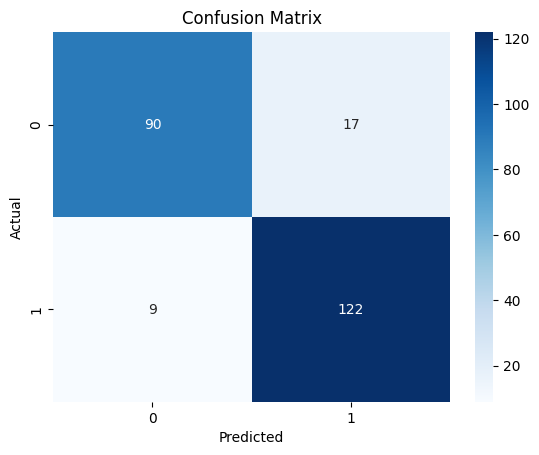

In [24]:
import seaborn as sns


# Predictions


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it nicely
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
import joblib
joblib.dump(knn, 'heart_knn_model.pkl')
print("Successfully saved model")

Successfully saved model


In [27]:
joblib.dump(scaler, "heart_scaler.pkl")
print("Successfully saved scaler")

Successfully saved scaler
